In [ ]:
"""
*****************************************************************
*                      >> IN THE NAME OF GOD <<                 *
* Small and large deflection analysis of cantilever beam with   *
* constant Moment                                               *
* This program solve the Deflection in X and Y                  *
*---------------------------------------------------------------*
* This program is written by Salar Delavar Ghashghaei (Qashqai) *
*                 E-mail: salar.d.ghashghaei@gmail.com          *
*---------------------------------------------------------------*
* NOTE:                                                         *
* Pseudo-Linear and ABAQUS diagram show for L0                  *
* Linear diagram show for L                                     *
*                                          Moment               *
*                                            ^)                 *
*                   ||------------------------                  *
*                   |<-        L,EI        ->|                  *
*                   |<-  L0,EI ->|< Delta_X >|                  *
*****************************************************************
"""

(-0.5, 991.5, 587.5, -0.5)

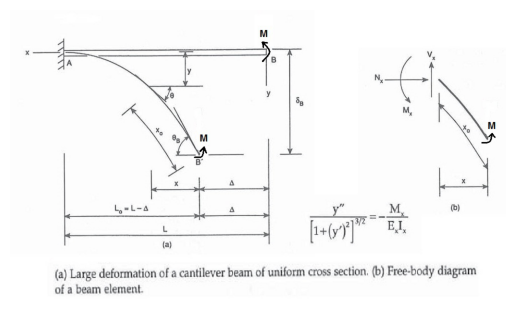

In [8]:
import matplotlib.image as mpimg
plt.figure(1)
IMAGE = mpimg.imread('nonlinearStrSALARex02.jpg')
plt.imshow(IMAGE)
plt.axis('image')
plt.axis('off')

In [5]:
import numpy as np
import sympy as sp
import time

# Given parameters
M = 3000 # Moment
L = 25.4 # Beam Length
EI = 215200 # Section Flexural Rigidity
Dmin = 0 # Minimum Guess
Dmax = L # Maximum Guess
nx = 0.00001 # Tolerance

# Monitor CPU time
starttime = time.time()

# Precompute constants
landa_factor = L / 10
landa_values = np.linspace(Dmin, Dmax, int((Dmax - Dmin) / nx) + 1)

# Convergence loop
for j, D in enumerate(landa_values):
    landa = landa_factor - D / 10
    x_values = np.linspace(0, landa * 10, 11)
    G = -(M * x_values) / EI
    Ybar = G / np.sqrt(1 - G**2)
    Y = np.sqrt(1 + Ybar**2)
    Lbar = (landa / 3) * (Y[0] + 4 * np.sum(Y[1::2]) + 2 * np.sum(Y[2:-1:2]) + Y[-1])
    A = np.round(L - Lbar, 5)
    if 0 < A <= nx * 5:
        print(f"Converged in {j + 1} iterations by Delta_x (m): {D}")
        print(f"Abaqus is converged by Delta_x (m): 0.5177")
        break

# Max Pseudo-Linear deflection
pmax = L - D
c = sp.symbols('c')
fmax = M / EI
fmaxD = sp.integrate(fmax, (c, 0, pmax))
fxmax = sp.integrate((M * c) / EI, (c, 0, pmax))
xBAR_max = fxmax / fmaxD
NONLIN = abs(fmaxD * (pmax - xBAR_max))

# Max linear deflection
LIN = abs((M * L**2) / (2 * EI))

# Print results
print(f"Max Pseudo-Linear deflection: {NONLIN:.5f} m")
print(f"Max linear deflection: {LIN:.5f} m")

# Monitor CPU time
endtime = time.time()
print(f"CPU time: {endtime - starttime:.5f} seconds")

Converged in 52748 iterations by Delta_x (m): 0.5274702076654361
Abaqus is converged by Delta_x (m): 0.5177
Max Pseudo-Linear deflection: 4.31210 m
Max linear deflection: 4.49693 m
CPU time: 4.40414 seconds
